In [1]:
# # bolier plate

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/MyDrive/mann")

In [3]:
!ls
# !python download_images.py

 code.ipynb				       image_file_to_array.py
'Copy of CS330_Homework1_Stencil copy.ipynb'   model.py
 create_meta_trainset.py		       omniglot_resized
 DataGenerator.py			       omniglot_resized.zip
 download_images.py			       __pycache__
 get_images.py


In [4]:
import warnings 

warnings.simplefilter("ignore")


## Setup

In [5]:
from typing import *
import numpy as np
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt

from scipy import misc

In [6]:
from pathlib import Path

__dirname = Path("__file__").parent
__dirname
paths = [ p for p in __dirname.glob("omniglot_resized/Atlantean/*")]
labels = [i for i in range(len(paths))]

* image batch has shape `[B, K, N, 784]` and label batch has shape `[B, K, N, N]` where B is batch size, K is number of samples per class, N is number of classes

In [7]:
from DataGenerator import DataGenerator
from create_meta_trainset import create_meta_trainset
from model import *

In [8]:
data_generator = DataGenerator(
    num_classes=4,
    num_samples_per_class=3,
)

meta_inputs, meta_labels = create_meta_trainset(*data_generator.sample_batch(
    batch_type="train", 
    batch_size=16, 
    one_hot=True,
))

In [9]:
meta_inputs[0, 0, :, -4:] # labels for metatrainset
# as you can see, the tail of matrix is masked with zero matrix.

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [10]:
meta_inputs[0, 0, :-4, -4:] # labels for metatrainset
# as you can see, the tail of matrix is masked with zero matrix.

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [11]:
meta_inputs[0, 0, -4: , -4:] # labels for metatrainset
# as you can see, the tail of matrix is masked with zero matrix.

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [12]:

def visualize_dataset(n_batches=0, n_task=0):
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10,10))
    axes = axes.reshape(-1)
    for i, row in enumerate(meta_inputs[n_batches, n_task, :, :]):
        flatten_image = row[:-4]
        label_vec = row[-4:]
        axes[i].imshow(flatten_image.reshape(28, 28))
        axes[i].set_title( "masked" if label_vec.sum() == 0 else np.argmax(label_vec))
    plt.show()
        

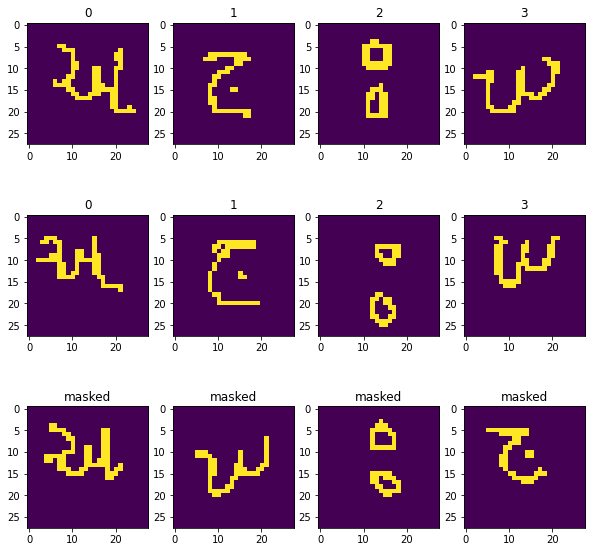

In [13]:
visualize_dataset()

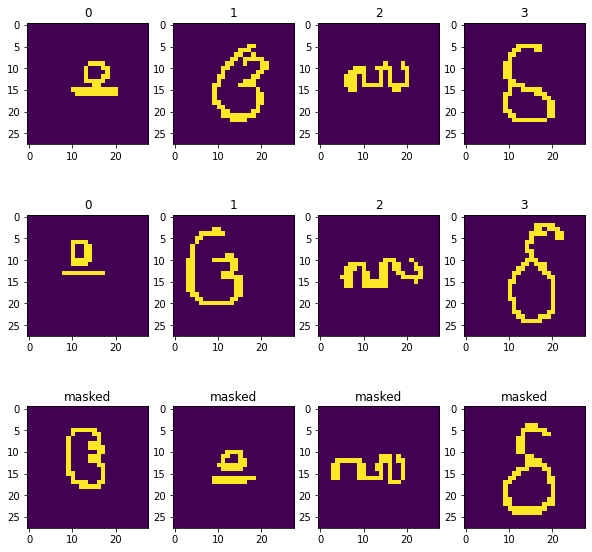

In [14]:
visualize_dataset(0, 1)

In [15]:
model = MANN(num_classes=4, num_samples=3).to(device="cuda")
criterion = nn.CrossEntropyLoss().to(device="cuda")


In [23]:
optim = torch.optim.Adam(params=model.parameters(), lr=0.00005)
for _ in range(10):
    train_model(
        model, 
        *create_meta_trainset(
            *data_generator.sample_batch(
                batch_type="train", 
                batch_size=64, 
                one_hot=True,
            ), 
        )   , criterion=criterion, optim=optim, cuda=True,
        epoch=2500,
        disp=500
    )
    eval_model(
        model, 
        *create_meta_trainset(
            *data_generator.sample_batch(
                batch_type="valid", 
                batch_size=4, 
                one_hot=True,
            )
        ), 
        cuda=True
    )

0.9094563126564026
0.8425588607788086
0.8047136664390564
0.7707664370536804
0.7638493776321411
0.22916666666666666
0.8913574814796448
0.8284167051315308
0.7836925387382507
0.7783669233322144
0.7725312113761902
0.24739583333333334
1.00419282913208
0.9614946842193604
0.9261969327926636
0.9064353704452515
0.9024856090545654
0.2604166666666667
0.97886723279953
0.9443907141685486
0.9289124011993408
0.9133450984954834
0.9031761884689331
0.2578125
1.057620644569397
1.0326656103134155
0.9937512278556824
0.9848988652229309
0.9790776371955872
0.2421875
1.1775530576705933
1.1406714916229248
1.121888518333435
1.1024965047836304
1.0998409986495972
0.25
1.1986726522445679
1.1885600090026855
1.1511598825454712
1.1309503316879272
1.1245243549346924
0.2421875
1.2388606071472168
1.2263283729553223
1.1950069665908813
1.1812154054641724
1.176194667816162
0.2421875
1.2743008136749268


KeyboardInterrupt: ignored